<a href="https://colab.research.google.com/github/loveskiddo/loveskiddo/blob/main/Jennifer's_%5BWeek_5%5D_Learning_Lab_5_More_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐧 Lab 5: Waddling Into Data

Hey Hey! In this lab, you will continue analyzing data visualizations 😀

Each section includes a pre-written chart and guiding questions to help you think critically about what the visualization shows.

Your goal is to answer the questions based upon the charts.

## Integrity

Write your own responses. If you use any outside sources, including AI tools, be sure to **cite them** and briefly explain **where and how** they were used.


In [1]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# Load seaborn penguins dataset
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1) Histogram — Distribution of a Numeric Feature

**Instructions:** Plot the histogram by running the cell below.

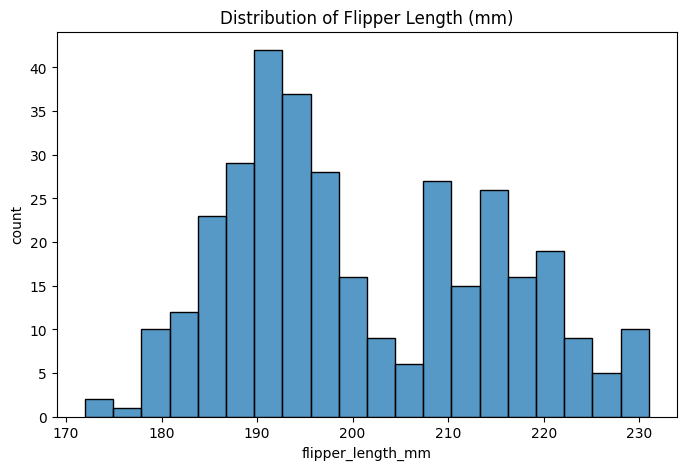

In [2]:
# Histogram
sns.histplot(data=df, x="flipper_length_mm", bins=20, kde=False)
plt.title("Distribution of Flipper Length (mm)")
plt.xlabel("flipper_length_mm"); plt.ylabel("count")
plt.show()

**Questions:**
- Where do most penguins’ flipper lengths seem to fall?
- If you were comparing two species of penguins, how might you use this type of chart to help you?
- If you wanted to describe an average penguin in this dataset, what flipper length would you mention?

**Answers (Respond with 2-3 sentences per each question):**
- Most of the penguins' flipper lengths seem to fall at 190mm. It could also be 195mm, but it's around that length.
- This chart would not be useful typically for comparing two species of penguins because it doesn't explicitly show the different species. You might use this chart to speculate one species has a larger flipper length than another.
- If I wanted to describe an average penguin I would most likely mention a flipper length of 190mm. There is not much else that can be mentioned to describe an average penguin aside from the flipper length.

## 2) Correlation Matrix — Relationships Among Numeric Features


**Instructions:** Run the cell below to display the correlation matrix!

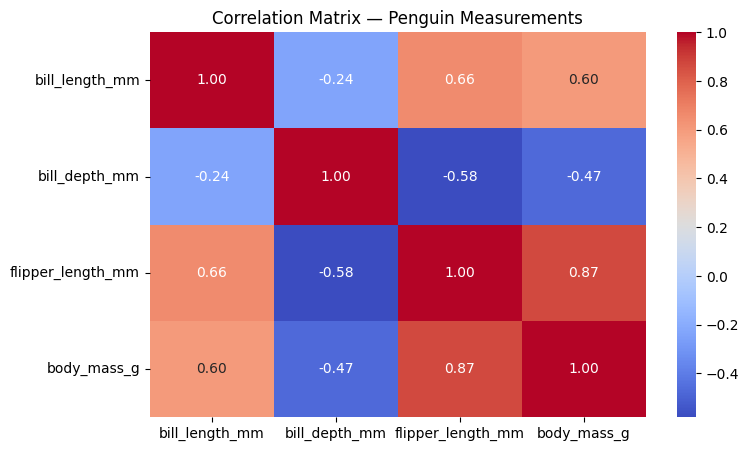

In [3]:
# Correlation matrix
num = df.select_dtypes(include=[np.number]).dropna()
corr = num.corr().round(2)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix — Penguin Measurements")
plt.show()

**Questions:**
- Which penguin measurements show the strongest positive correlation? How about the strongest negative correlation?
- Are any variables nearly uncorrelated? What might that imply?

**Answers (Respond with 2-3 sentences per each question):**
- The strongest positive correlation is between flipper length and body mass. The strongest negative correlation is flipper length and bill depth.
- The bill depth and bill depth appear nearly uncorrelated. This might imply that there is not much of relationship between bill depth and length.

## 3) Line Graph — Trend Over Time

**Instructions:** Run the cell below to display the line graph!

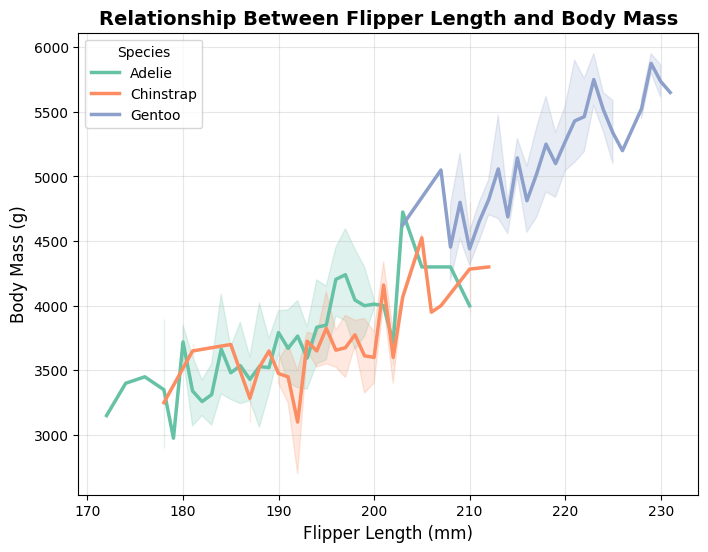

In [4]:
df = sns.load_dataset("penguins").dropna(subset=["flipper_length_mm", "body_mass_g", "species"])

# Sort values so the line graph connects in order
df = df.sort_values("flipper_length_mm")

plt.figure(figsize=(8,6))
sns.lineplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    linewidth=2.5,
    palette="Set2"
)

plt.title("Relationship Between Flipper Length and Body Mass", fontsize=14, weight="bold")
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Species", loc="best")
plt.show()




**Questions:**
- If you saw two penguins with the same flipper length but different body masses,
what could explain the difference (think species, sex, or environment)?
- What general pattern do you notice between flipper length and body mass?
- What might explain why larger penguins also have longer flippers?

**Answers (Respond with 2-3 sentences per each question):**
- If I saw two penguins with the same flipper length but different body masses, I would assume their differences must be due to their species first. If they are the same species, I would assume it was due to environment based on natural selection.
- I see a positve relationship between flipper length and body mass. Most often, a larger flipper length tends to point towards a higher body mass.
- Larger penguins might have longer flippers so that they can still swim. If they had shorter flippers, it might make them weaker swimmers and more susceptible to predators.

## 4) Pie Chart — Proportions of a Category

**Instructions:** Plot the pie chart by running the cell below.

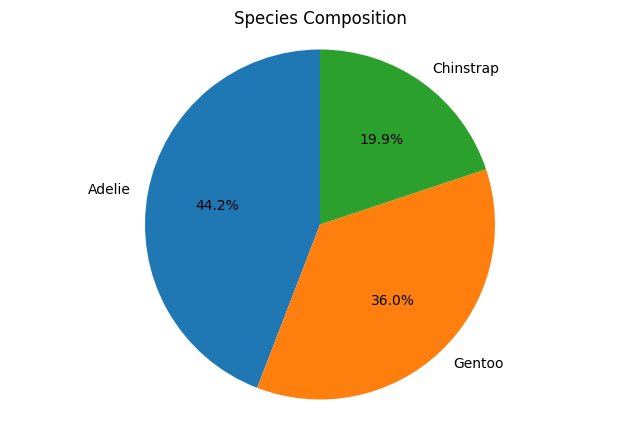

In [5]:
# Pie chart: species composition
counts = df["species"].value_counts(dropna=True)
plt.figure()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Species Composition")
plt.axis("equal")
plt.show()

**Questions:**
- Which penguin species makes up the largest part of the dataset? Which species makes up the smallest part?
- Why do you think one species might appear more often in the data than others?
- If the sample were collected differently, how might these proportions change?

**Answers (Respond with 2-3 sentences per each question):**
- The Adelie species makes up the largest part of the dataset. The Chinstrap species makes up the smallest part.
- I think one species might appear more often than other based on  the sample distribution. This sample appears to have used more of one species than another, possibly to simulate the environment.
- A different sample collection would change the amount of species that were studied- that is to create this data. So the graphs would change and the conclusions would as well.

## 5) Bar Chart — Comparing Group Averages

**Instructions**: Plot the bart chart by running the cell below.

/tmp/ipython-input-2446659581.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="species", y="flipper_length_mm", ci=95, estimator=np.mean)


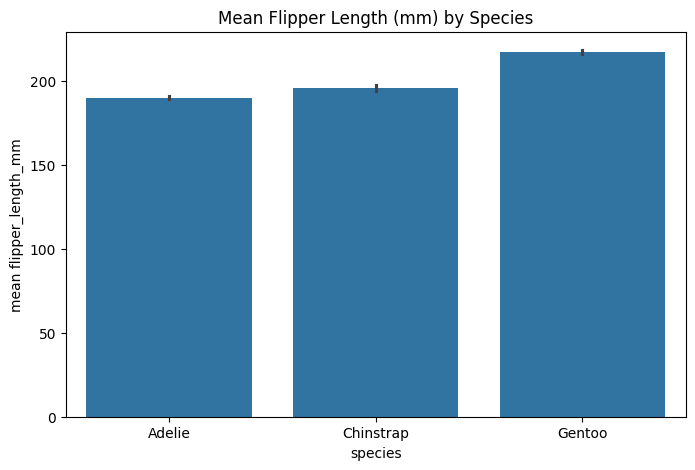

In [6]:
# Bar chart: mean flipper length by species
sns.barplot(data=df, x="species", y="flipper_length_mm", ci=95, estimator=np.mean)
plt.title("Mean Flipper Length (mm) by Species")
plt.xlabel("species"); plt.ylabel("mean flipper_length_mm")
plt.show()

**Questions:**
- If you were explaining this chart to a friend, how would you describe the main takeaway in two sentences?
- Why might Gentoo penguins have longer flippers than the other species?
- About how many millimeters longer are Gentoo penguins’ flippers compared to Adelie penguins?

**Answers (Respond with 2-3 sentences per each question):**
- I would ultimately say that the Gentoo species on average tend to have the largest flipper length. THe Adelie species' mean flipper length is the smallest and Chinstrap is between the two.
- Gentoo penguins might have longer flippers than other species possibly because they are larger. They might also have them as an swimming advantage based on their environment.
- The Gentoo penguins' flippers are probably about 210 mm and the Adelie penguins are around 180-190mm. So the difference would be roughly 20-30 mm.

### 💾 **Submission Instructions**

1. When you have completed all parts of this lab, save your notebook file (`.ipynb`).  
2. Create a **new repository** on your GitHub account.  
   - Name it `penguin-visualization-lab-[your_name]`
3. Upload your completed Jupyter Notebook (`.ipynb`) to that repository.  
4. Once your notebook is uploaded, **copy the link to your GitHub repository**.  
5. Go to **Google Classroom** and submit your **GitHub repository link** as your final lab submission.  

> ✅ *Make sure your repository is set to “Public” (or shareable) so we can view your work.*
